In [2]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline


## read dataset

In [21]:
data = pd.read_excel("C:/Users/Najma Akmalina Ni'ma/Downloads/Indikator Sosial dan Kependudukan Sumut 2022.xlsx") 
data = data.drop("No", axis="columns")
data = data.drop("Kabupaten/ Kota", axis="columns")

In [22]:
data

,Mean_Upah,Mean_Pengeluaran,IPM,GK,TPT,TPAK
0,1936186,756507,63.69,454570,2.81,84.50
1,2446786,986053,68.05,450345,7.64,71.15
2,2570717,985014,70.92,445612,3.65,74.53
3,2169552,910016,70.31,450940,7.97,76.51
4,3220528,980647,74.14,466316,1.07,81.07
5,3169912,1314085,75.96,465681,1.39,79.04
6,2640800,1080056,72.92,489503,6.90,63.51
7,2395538,1119177,71.13,397944,6.26,65.68
8,2452670,1079047,73.77,441744,5.51,69.91
9,4265440,1023193,72.56,436713,0.88,85.01


## Recheck dataset and cleaning

In [23]:
data.dtypes

Mean_Upah             int64
Mean_Pengeluaran      int64
IPM                 float64
GK                    int64
TPT                 float64
TPAK                float64
dtype: object

In [81]:
# # Menghapus simbol persen dan mengubah menjadi float
# data['INFLASI'] = data['INFLASI'].str.replace('%', '').astype(float)
# data['PERTUMBUHAN EKONOMI'] = data['PERTUMBUHAN EKONOMI'].str.replace('%', '').str.replace('$', '').astype(float)


C:\Users\Najma Akmalina Ni'ma\AppData\Local\Temp\ipykernel_8188\3670423156.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['PERTUMBUHAN EKONOMI'] = data['PERTUMBUHAN EKONOMI'].str.replace('%', '').str.replace('$', '').astype(float)


In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a scaler object
scaler = StandardScaler()

# Scale the data
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame, preserving the column names
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Check the result
print(data_scaled.head())


   Mean_Upah  Mean_Pengeluaran       IPM        GK       TPT      TPAK
0  -1.256291         -1.487468 -1.861786 -0.252950 -0.686198  1.403513
1  -0.334786         -0.479891 -0.860014 -0.320997  1.113886 -0.274373
2  -0.111121         -0.484452 -0.200591 -0.397226 -0.373140  0.150440
3  -0.835124         -0.813651 -0.340747 -0.311414  1.236873  0.399295
4   1.061626         -0.503621  0.539250 -0.063772 -1.334676  0.972416


<AxesSubplot:>

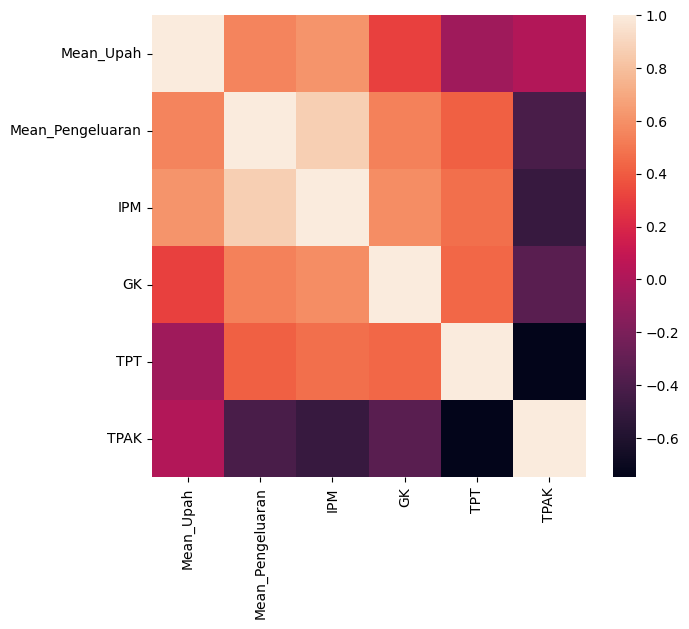

In [24]:
import seaborn as sns
corr_matrix = data_scaled.corr()
fig = plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix)

In [25]:
data_scaled.dtypes

Mean_Upah           float64
Mean_Pengeluaran    float64
IPM                 float64
GK                  float64
TPT                 float64
TPAK                float64
dtype: object

In [26]:
print(data_scaled[['Mean_Upah', 'Mean_Pengeluaran', 'IPM', 'GK', 'TPT', 'TPAK']].isnull().sum())
# data = data_scaled.dropna(subset=['PERTUMBUHAN EKONOMI'])
# data.isnull().sum()



Mean_Upah           0
Mean_Pengeluaran    0
IPM                 0
GK                  0
TPT                 0
TPAK                0
dtype: int64


In [27]:
#setting the value for x and y
y = data['GK']
x = data[['Mean_Upah', 'Mean_Pengeluaran', 'IPM', 'TPT', 'TPAK']]

In [37]:
# Menambahkan intercept
X = sm.add_constant(x)

# 3. Membangun Model Regresi Linier Berganda
model = sm.OLS(y, x).fit()

In [38]:

# 4. Mengidentifikasi Multikolinieritas
# Menghitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


print("Variansi Inflasi Faktor (VIF):")
print(vif_data)

Variansi Inflasi Faktor (VIF):
            feature         VIF
0         Mean_Upah   44.098303
1  Mean_Pengeluaran   71.766217
2               IPM  350.241092
3               TPT   10.005728
4              TPAK  122.422118


In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf


In [34]:
# 5. Uji Heteroskedastisitas
# Melakukan uji Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_results = pd.DataFrame({
    'Lagrange Multiplier Statistic': bp_test[0],
    'p-value': bp_test[1],
    'f-value': bp_test[2],
    'f p-value': bp_test[3]
}, index=['Breusch-Pagan'])
print("\nUji Heteroskedastisitas:")
print(bp_results)


Uji Heteroskedastisitas:
               Lagrange Multiplier Statistic   p-value  f-value  f p-value
Breusch-Pagan                      17.115893  0.001835  6.03427   0.000657


<Figure size 1200x600 with 0 Axes>

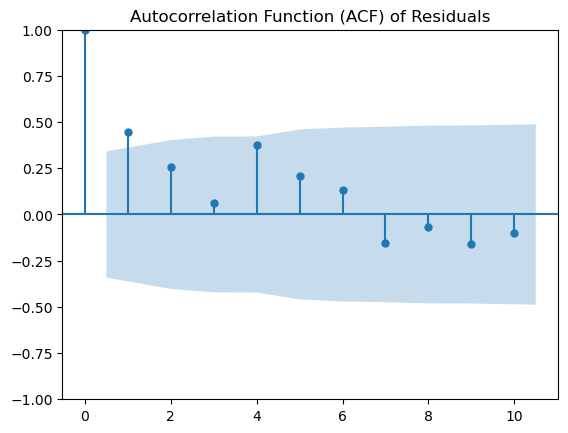

In [35]:
# 6. Uji Autokorelasi
# Plot ACF untuk melihat autokorelasi
plt.figure(figsize=(12, 6))
plot_acf(model.resid, lags=10)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

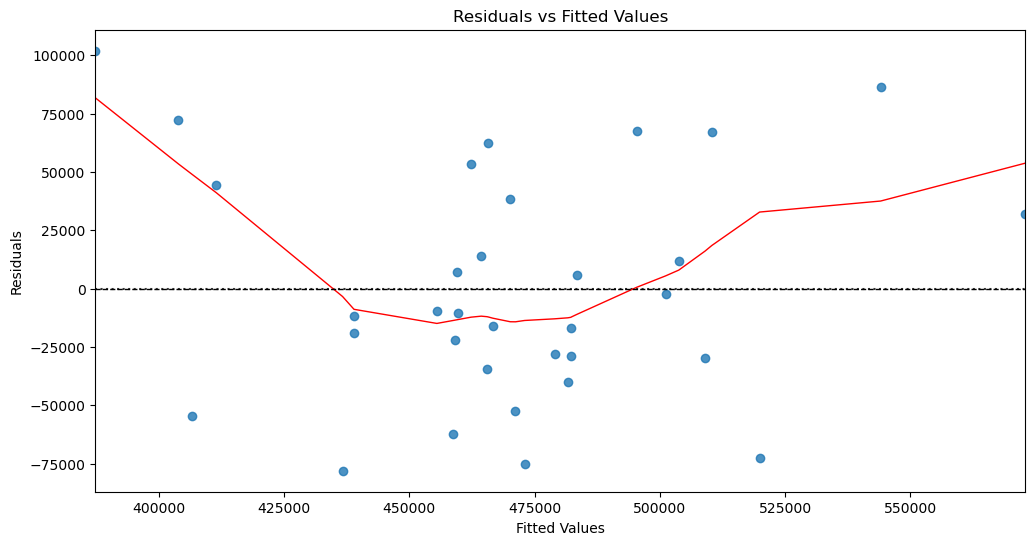

In [36]:
# 7. Analisis Residual
# Plot residuals untuk melihat pola
plt.figure(figsize=(12, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, 
               line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, color='black', ls='--', lw=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()